In [1]:
import gym
import numpy as np
import time
import matplotlib.pyplot as plt
from pprint import pprint

def main():
    state, action = 0, 0
    env = gym.make("CliffWalking-v0")
    print('Пространство состояний:')
    pprint(env.observation_space)
    print()
    print('Пространство действий:')
    pprint(env.action_space)
    print()
    print('Диапазон наград:')
    pprint(env.reward_range)
    print()
    print('Вероятности для 0 состояния и 0 действия:')
    pprint(env.P[state][action])
    print()
    print('Вероятности для 0 состояния:')
    pprint(env.P[state])


if __name__ == '__main__':
    main()

Пространство состояний:
Discrete(48)

Пространство действий:
Discrete(4)

Диапазон наград:
(-inf, inf)

Вероятности для 0 состояния и 0 действия:
[(1.0, 0, -1, False)]

Вероятности для 0 состояния:
{0: [(1.0, 0, -1, False)],
 1: [(1.0, 1, -1, False)],
 2: [(1.0, 12, -1, False)],
 3: [(1.0, 0, -1, False)]}


In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint


class PolicyIterationAgent:
    '''
    Класс, эмулирующий работу агента
    '''
    def __init__(self, env):
        self.env = env
        # Пространство состояний
        self.observation_dim = 48
        # Массив действий в соответствии с документацией
        # https://www.gymlibrary.dev/environments/toy_text/frozen_lake/
        self.actions_variants = np.array([0,1,2,3])
        # Задание стратегии (политики)
        # Карта 4х4 и 4 возможных действий 
        self.policy_probs = np.full((self.observation_dim, len(self.actions_variants)), 0.25)
        # Начальные значения для v(s)
        self.state_values = np.zeros(shape=(self.observation_dim))
        # Начальные значения параметров
        self.maxNumberOfIterations = 1000
        self.theta=1e-6
        self.gamma=0.99


    def print_policy(self):
        '''
        Вывод матриц стратегии
        '''
        print('Стратегия:')
        pprint(self.policy_probs)


    def policy_evaluation(self):
        '''
        Оценивание стратегии 
        '''
        # Предыдущее значение функции ценности
        valueFunctionVector = self.state_values
        for iterations in range(self.maxNumberOfIterations):
            # Новое значение функции ценности
            valueFunctionVectorNextIteration=np.zeros(shape=(self.observation_dim))
            # Цикл по состояниям
            for state in range(self.observation_dim):
                # Вероятности действий
                action_probabilities = self.policy_probs[state]
                # Цикл по действиям
                outerSum=0
                for action, prob in enumerate(action_probabilities):
                    innerSum=0
                    # Цикл по вероятностям действий
                    for probability, next_state, reward, isTerminalState in self.env.P[state][action]:
                        innerSum=innerSum+probability*(reward+self.gamma*self.state_values[next_state])
                    outerSum=outerSum+self.policy_probs[state][action]*innerSum
                valueFunctionVectorNextIteration[state]=outerSum
            if(np.max(np.abs(valueFunctionVectorNextIteration-valueFunctionVector))<self.theta):
                # Проверка сходимости алгоритма
                valueFunctionVector=valueFunctionVectorNextIteration
                break
            valueFunctionVector=valueFunctionVectorNextIteration
        return valueFunctionVector               


    def policy_improvement(self):
        '''
        Улучшение стратегии 
        '''
        qvaluesMatrix=np.zeros((self.observation_dim, len(self.actions_variants)))
        improvedPolicy=np.zeros((self.observation_dim, len(self.actions_variants)))
        # Цикл по состояниям
        for state in range(self.observation_dim):
            for action in range(len(self.actions_variants)):
                for probability, next_state, reward, isTerminalState in self.env.P[state][action]:
                    qvaluesMatrix[state,action]=qvaluesMatrix[state,action]+probability*(reward+self.gamma*self.state_values[next_state])
                
            # Находим лучшие индексы
            bestActionIndex=np.where(qvaluesMatrix[state,:]==np.max(qvaluesMatrix[state,:]))
            # Обновление стратегии
            improvedPolicy[state,bestActionIndex]=1/np.size(bestActionIndex)
        return improvedPolicy    


    def policy_iteration(self, cnt):
        '''
        Основная реализация алгоритма
        '''
        policy_stable = False
        for i in range(1, cnt+1):
            self.state_values = self.policy_evaluation()
            self.policy_probs = self.policy_improvement()
        print(f'Алгоритм выполнился за {i} шагов.')


def play_agent(agent):
    env2 = gym.make('CliffWalking-v0', render_mode='human')
    state = env2.reset()[0]
    done = False
    while not done:
        p = agent.policy_probs[state]
        if isinstance(p, np.ndarray):
            action = np.random.choice(len(agent.actions_variants), p=p)
        else:
            action = p
        next_state, reward, terminated, truncated, _ = env2.step(action)
        env2.render()
        state = next_state
        if terminated or truncated:
            done = True


def main():
    # Создание среды
    env = gym.make('CliffWalking-v0')
    env.reset()
    # Обучение агента
    agent = PolicyIterationAgent(env)
    agent.print_policy()
    agent.policy_iteration(1000)
    agent.print_policy()
    # Проигрывание сцены для обученного агента
    play_agent(agent)


if __name__ == '__main__':
    main()

Стратегия:
array([[0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],
       [0.25, 0.25, 0.25, 0.25],

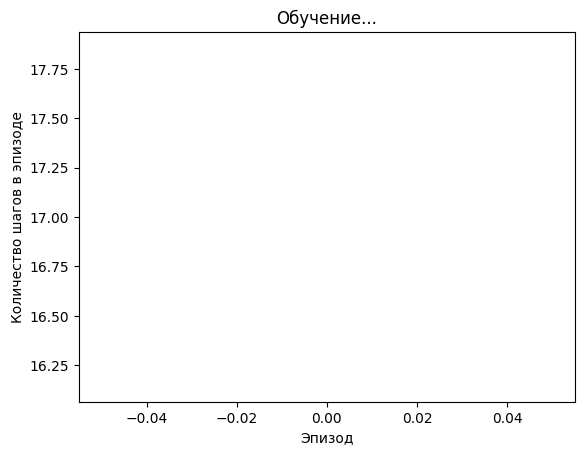

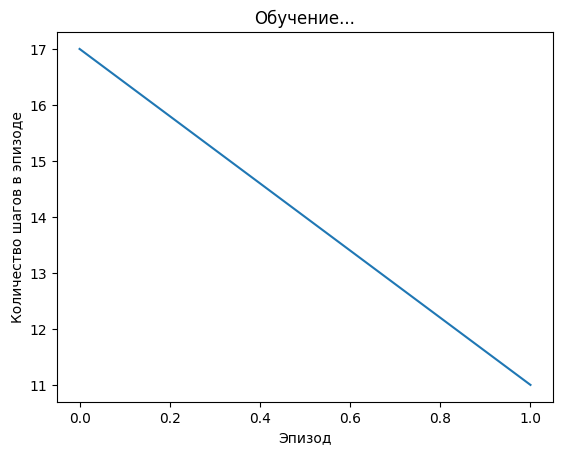

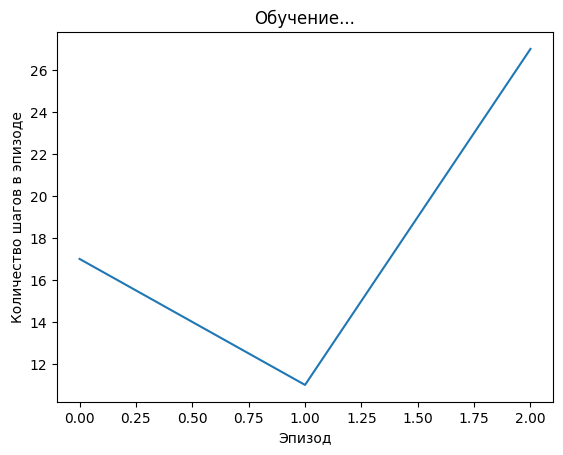

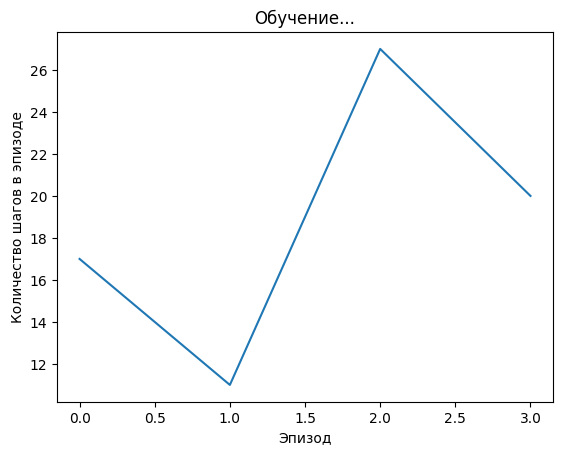

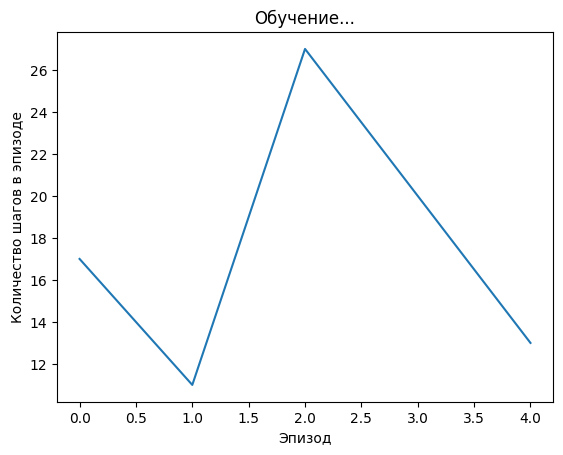

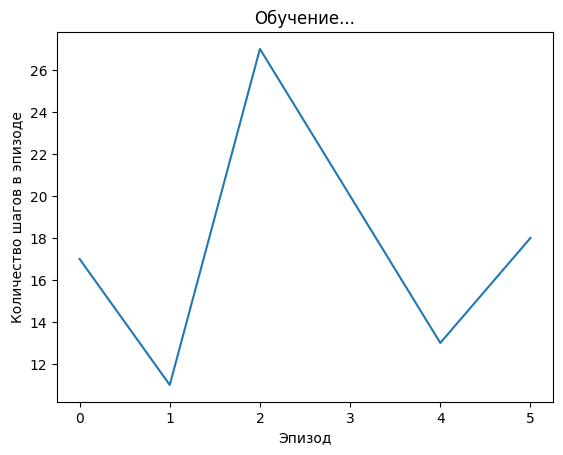

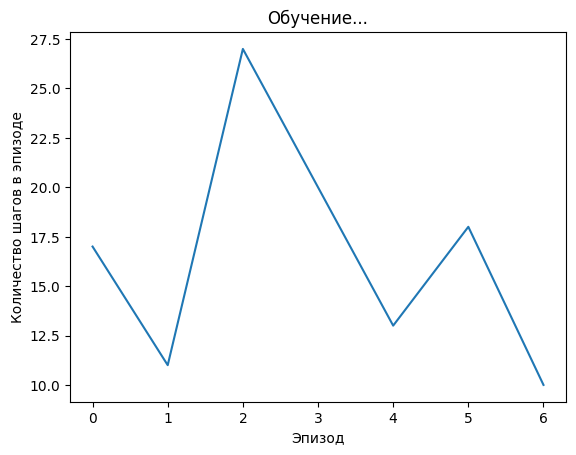

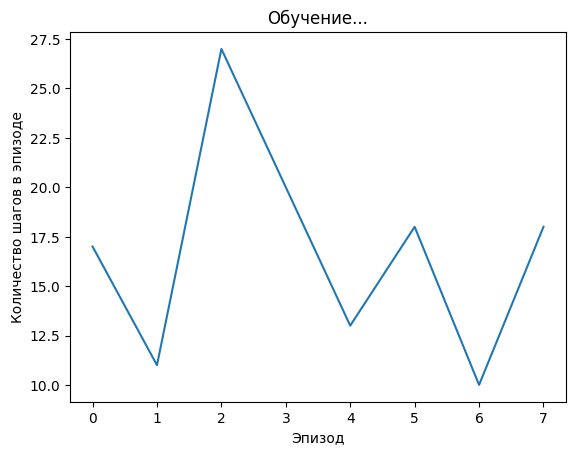

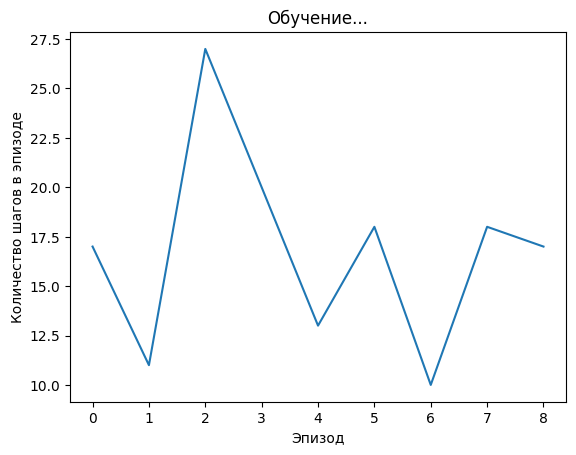

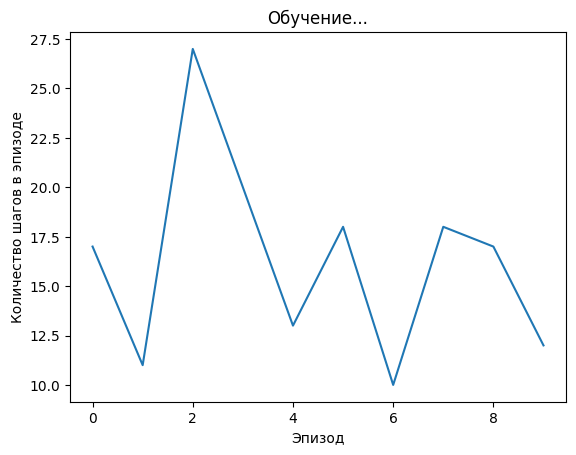

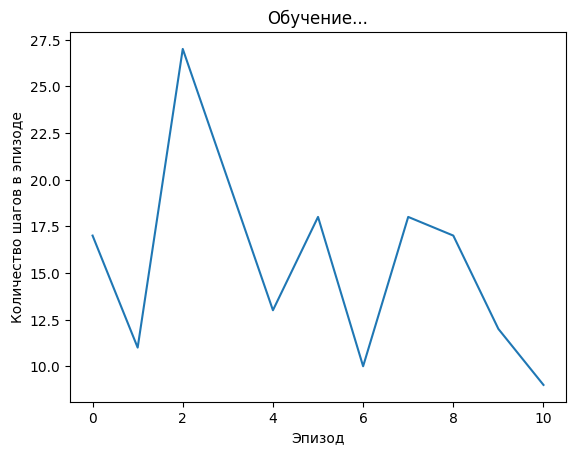

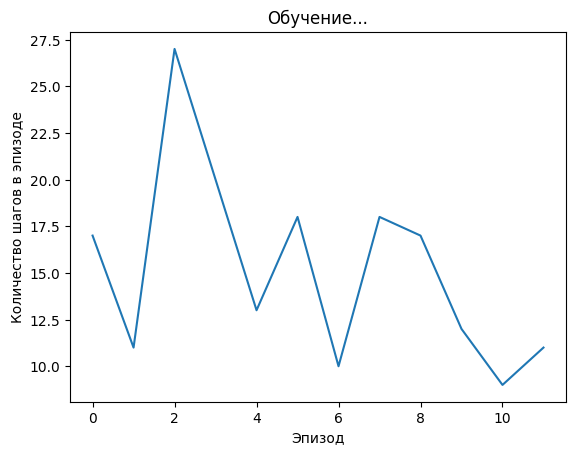

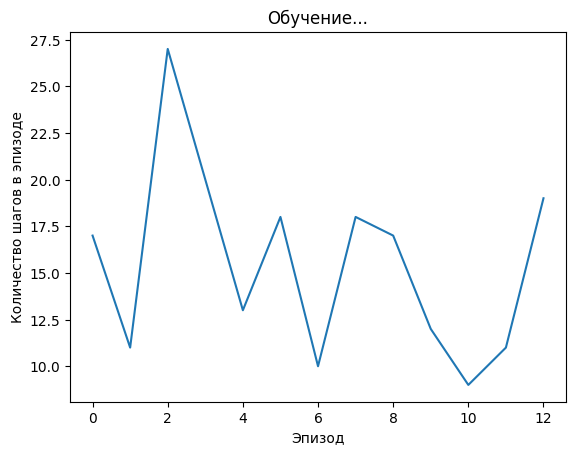

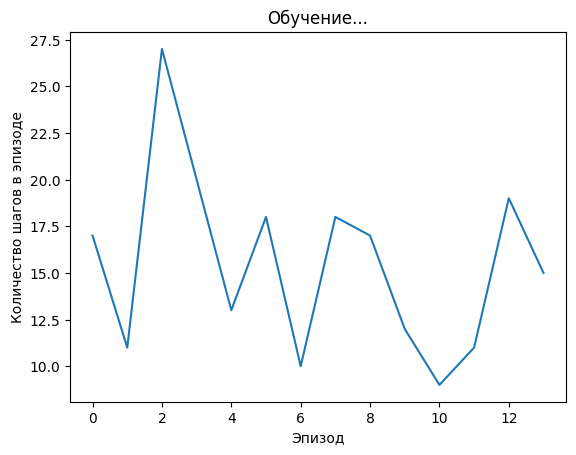

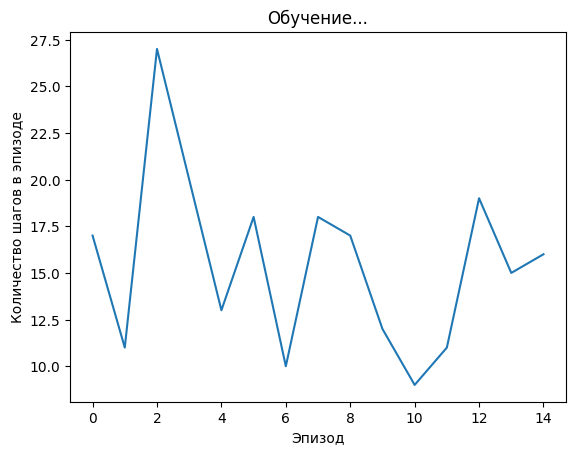

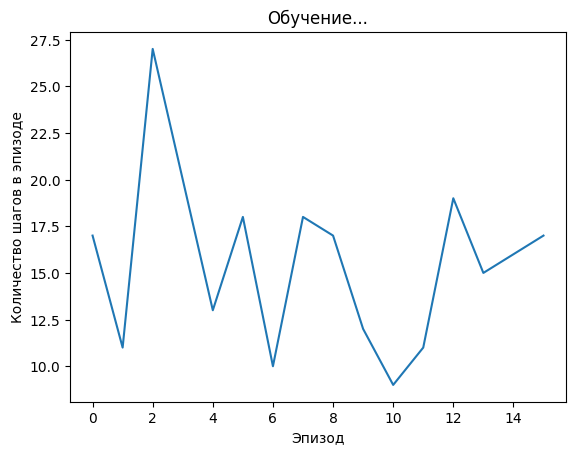

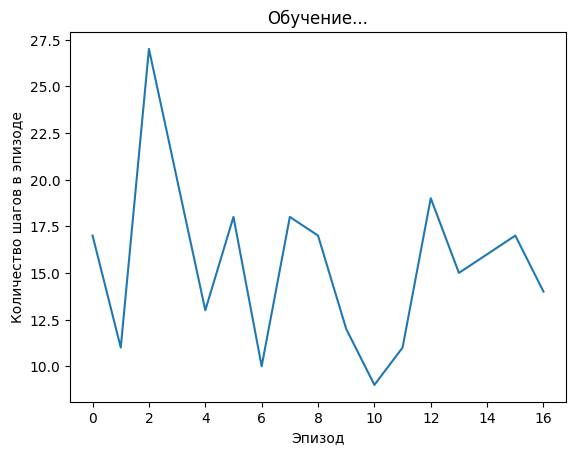

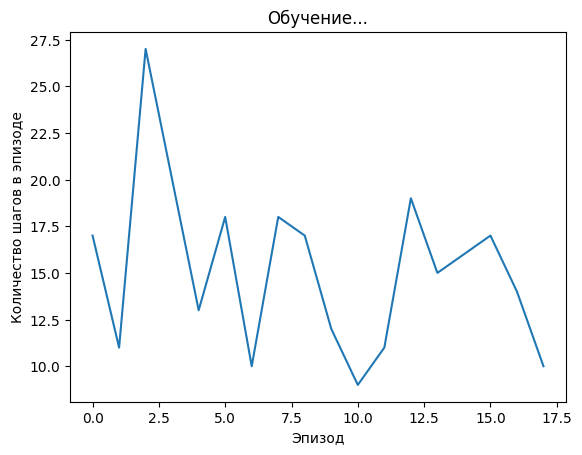

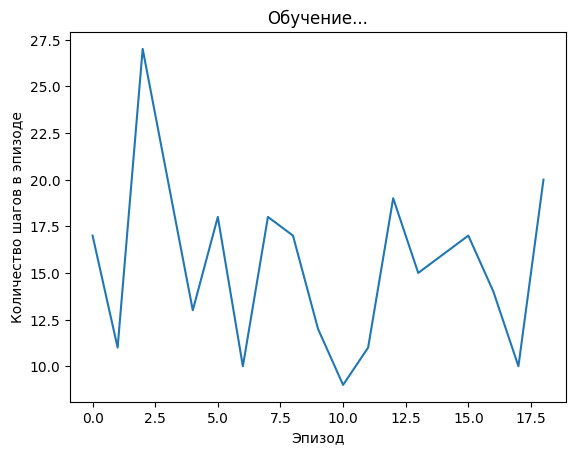

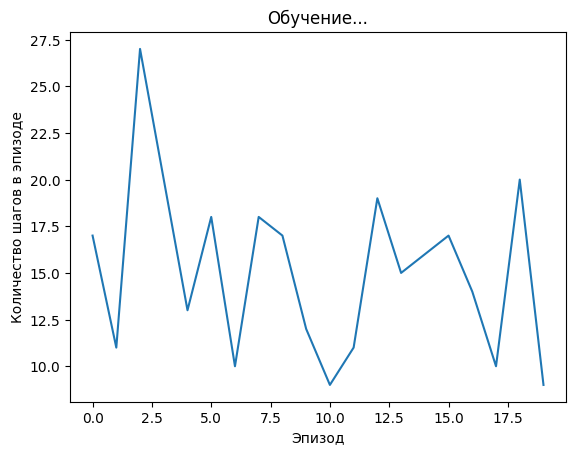

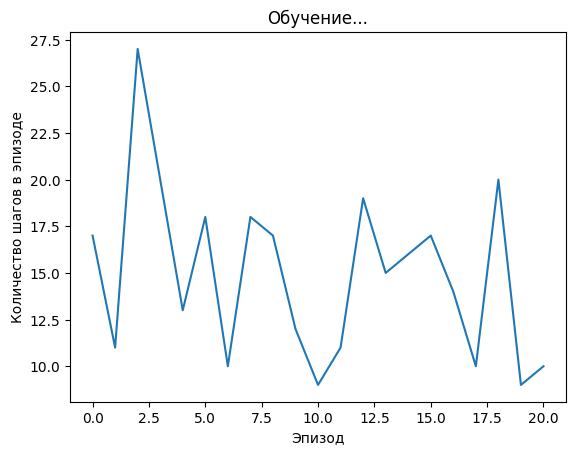

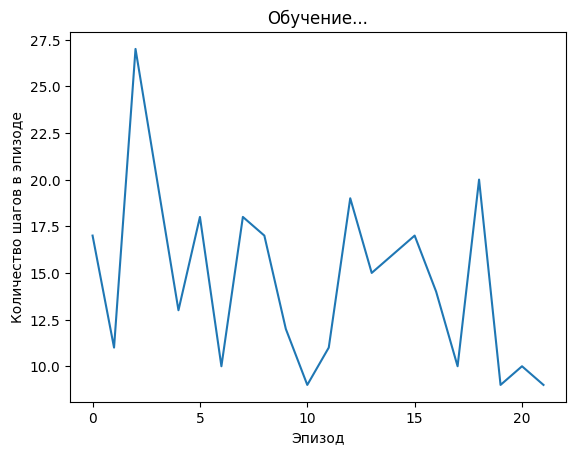

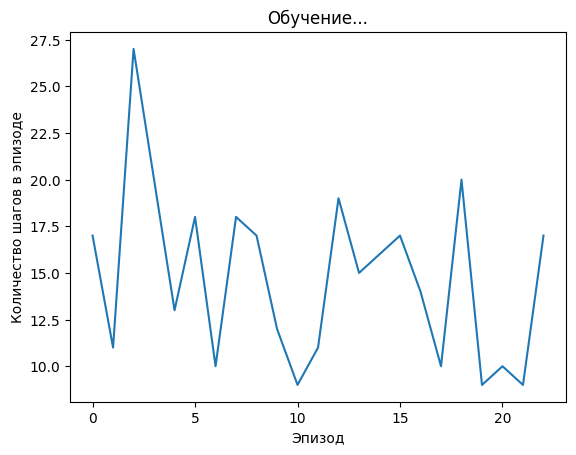

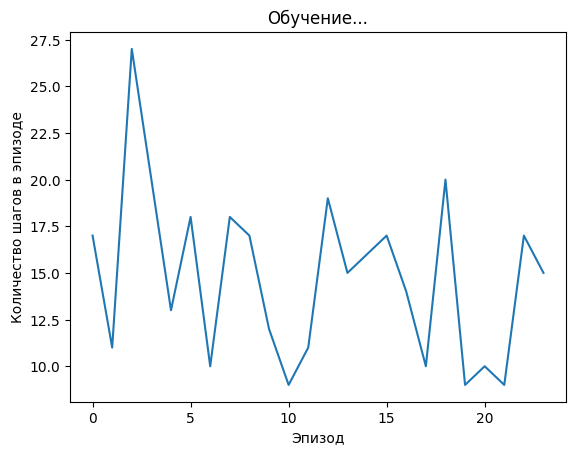

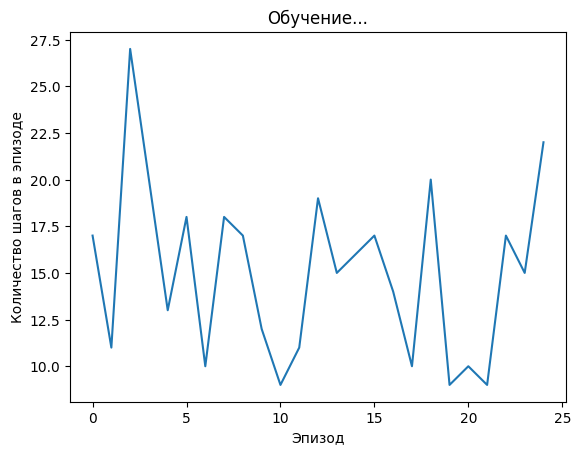

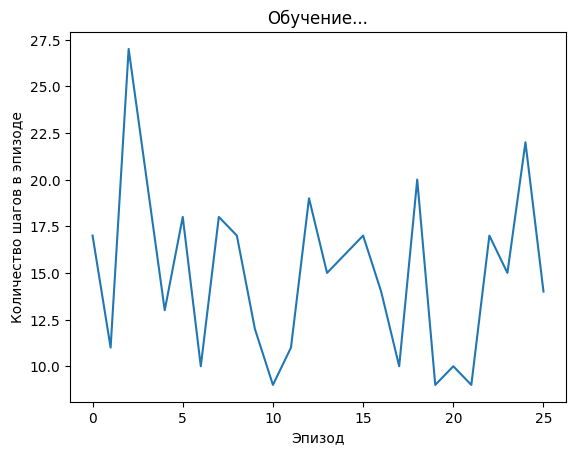

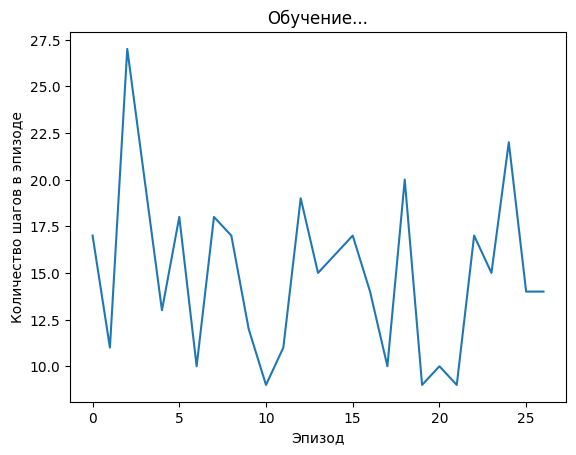

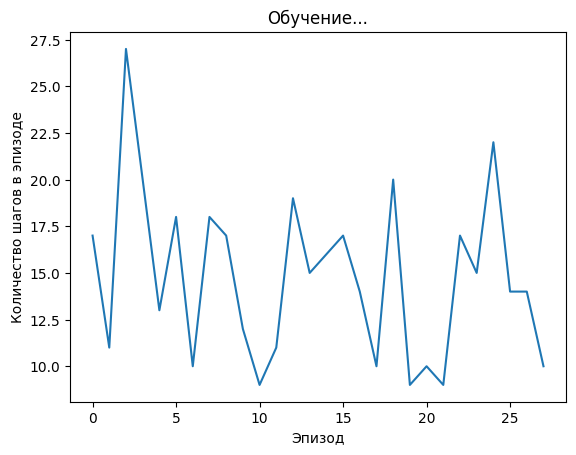

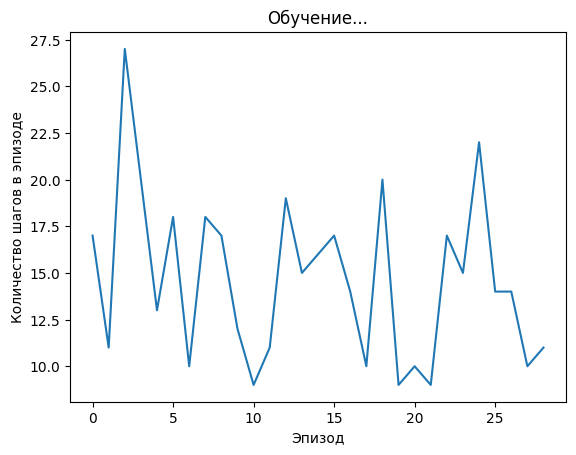

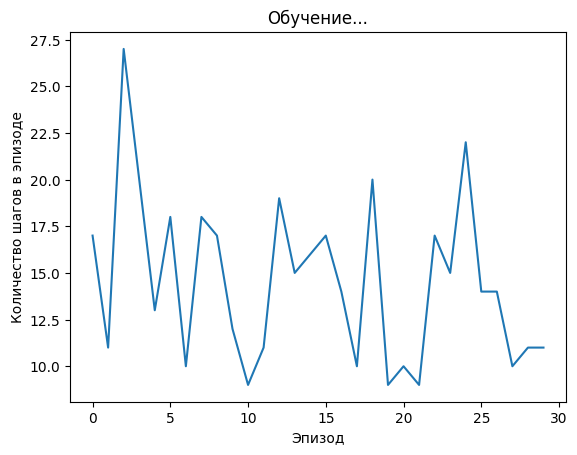

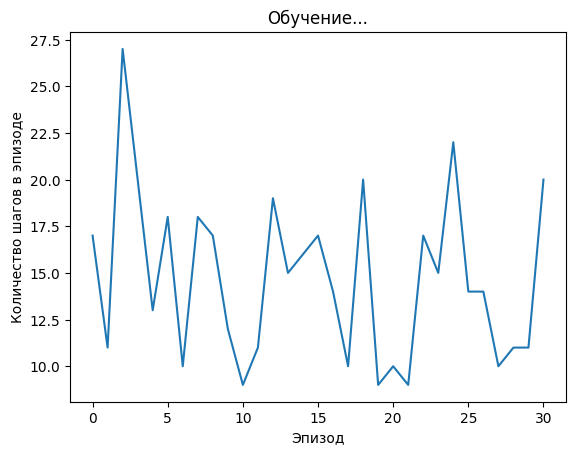

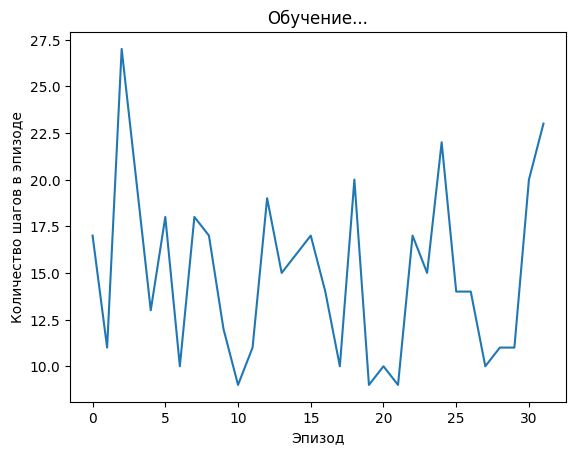

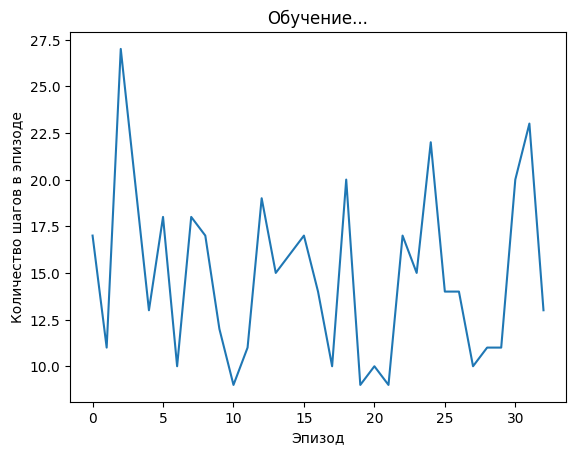

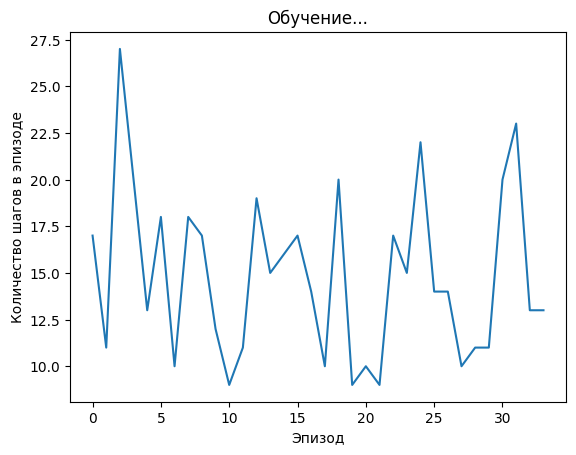

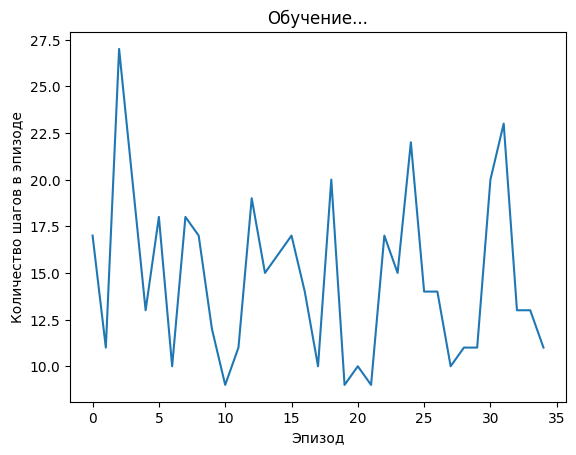

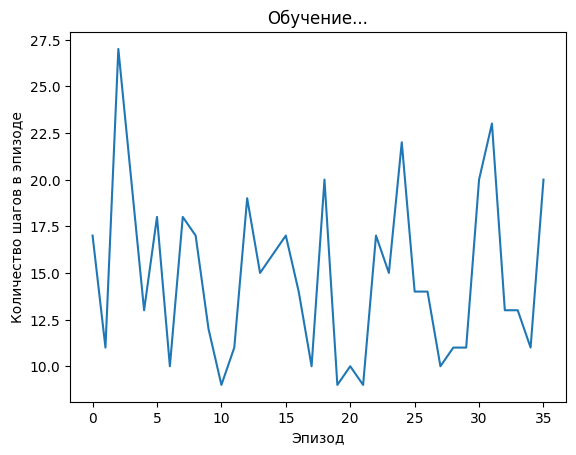

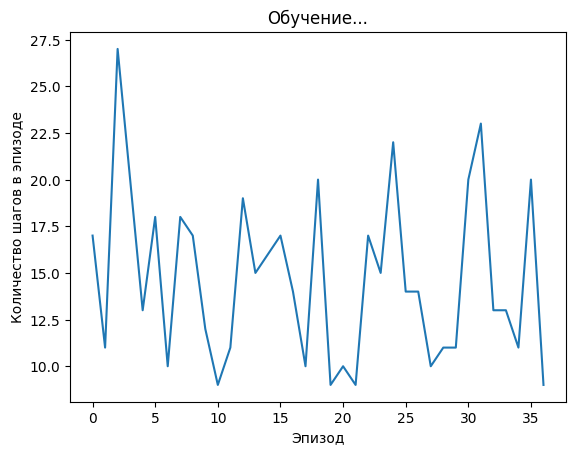

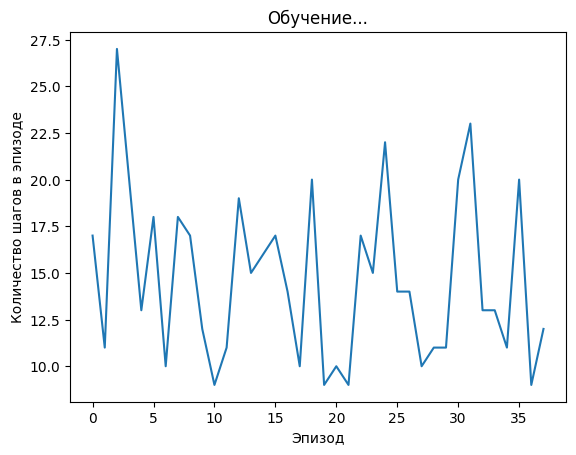

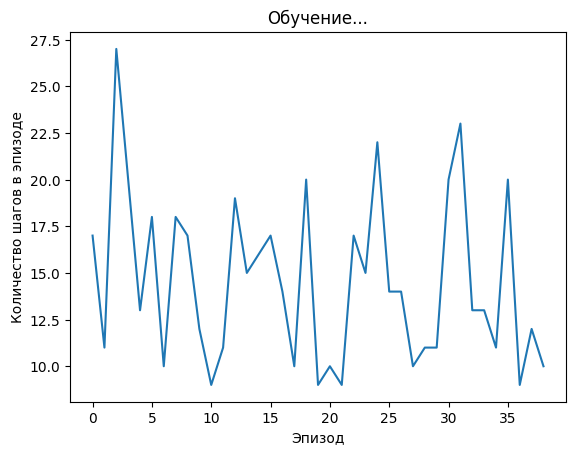

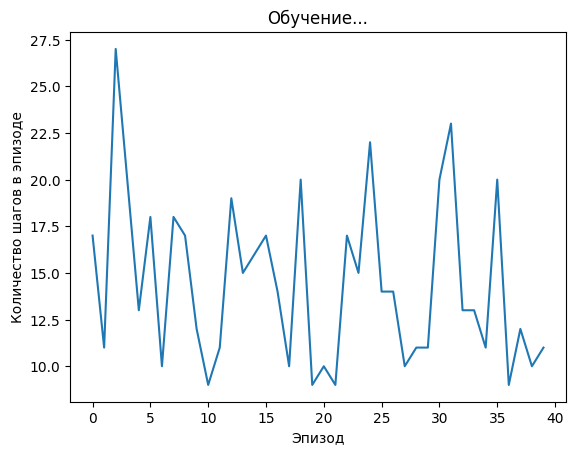

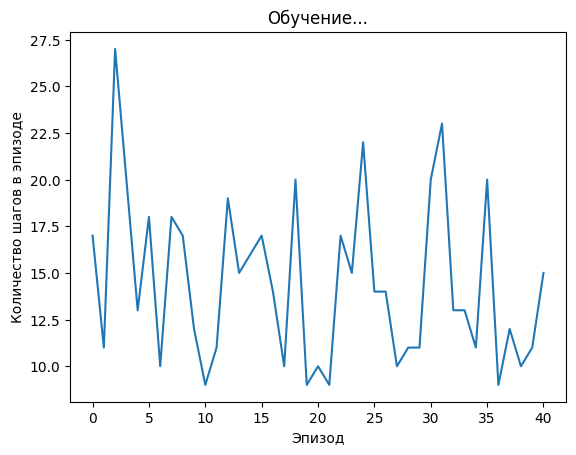

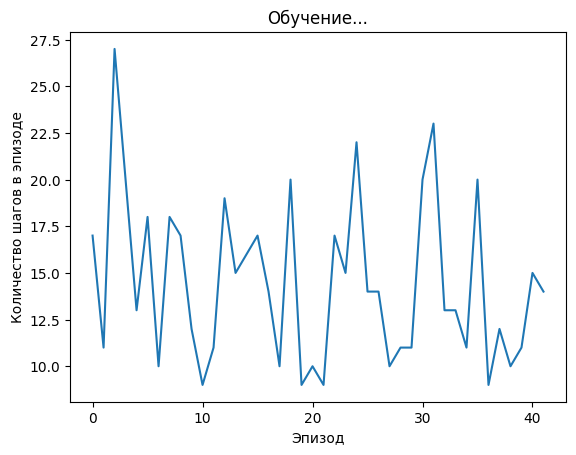

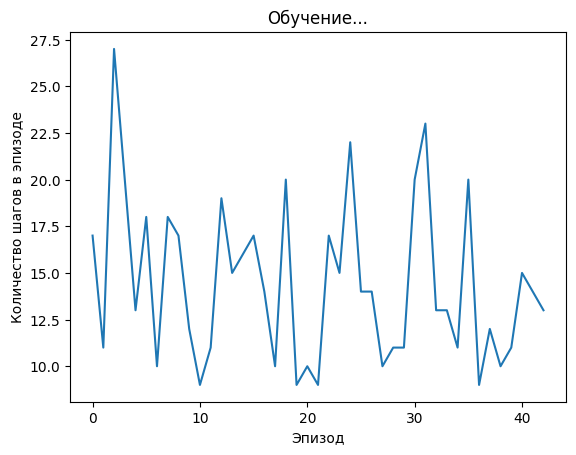

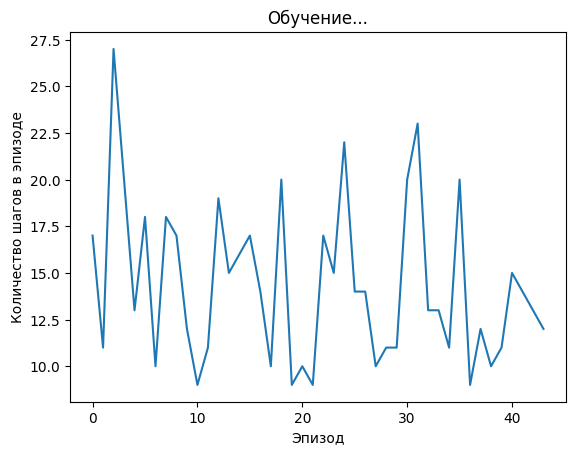

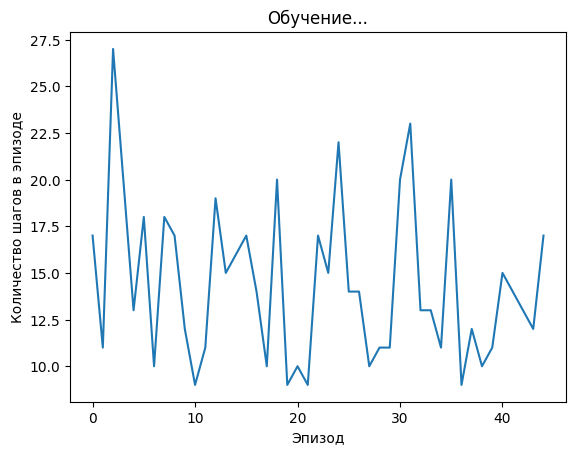

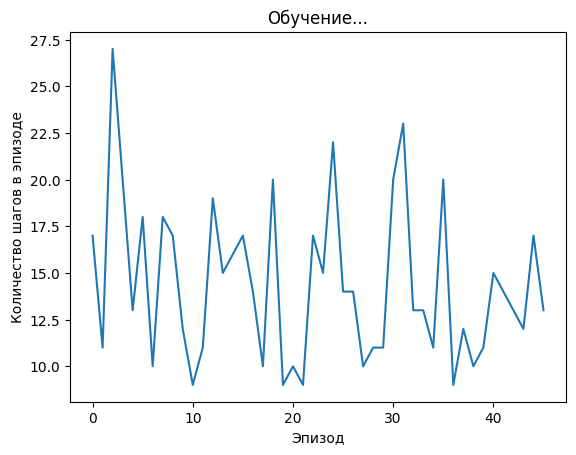

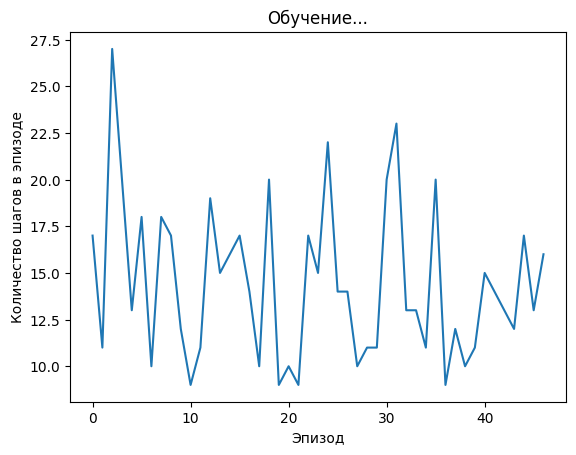

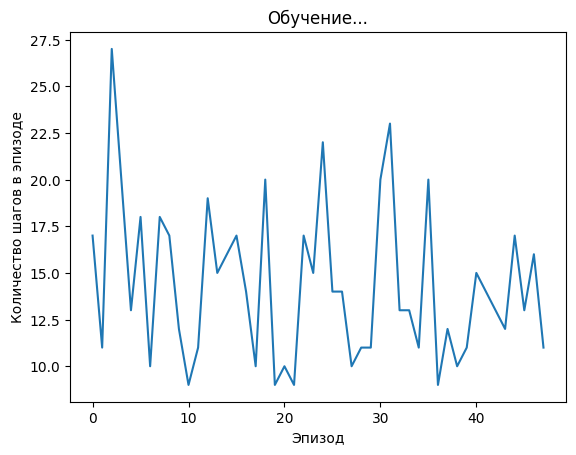

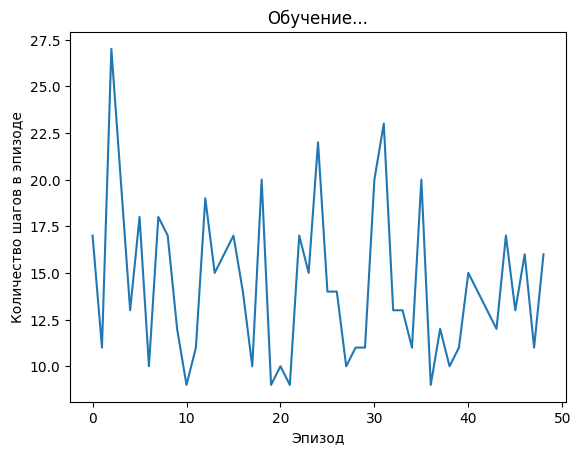

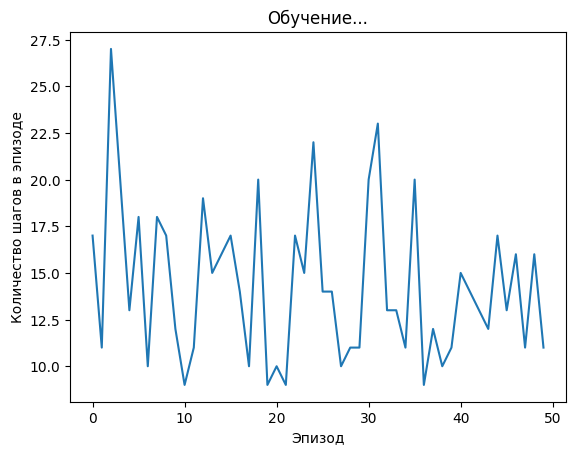

Данные об эпизоде:  [(1, 1.0), (1, 1.0), (1, 1.0), (1, 1.0), (1, 1.0), (1, 1.0), (1, 1.0), (1, 1.0), (1, 1.0)]


In [3]:
import gym
import math
import random
import matplotlib
import matplotlib.pyplot as plt
from collections import namedtuple, deque
from itertools import count

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


# Название среды
CONST_ENV_NAME = 'CartPole-v1'
# Использование GPU
CONST_DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Элемент ReplayMemory в форме именованного кортежа
Transition = namedtuple('Transition',
                        ('state', 'action', 'next_state', 'reward'))

# Реализация техники Replay Memory
class ReplayMemory(object):

    def __init__(self, capacity):
        self.memory = deque([], maxlen=capacity)

    def push(self, *args):
        '''
        Сохранение данных в ReplayMemory
        '''
        self.memory.append(Transition(*args))

    def sample(self, batch_size):
        '''
        Выборка случайных элементов размера batch_size
        '''
        return random.sample(self.memory, batch_size)

    def __len__(self):
        return len(self.memory)


class DQN_Model(nn.Module):

    def __init__(self, n_observations, n_actions):
        '''
        Инициализация топологии нейронной сети
        '''
        super(DQN_Model, self).__init__()
        self.layer1 = nn.Linear(n_observations, 128)
        self.layer2 = nn.Linear(128, 128)
        self.layer3 = nn.Linear(128, n_actions)

    def forward(self, x):
        '''
        Прямой проход
        Вызывается для одного элемента, чтобы определить следующее действие
        Или для batch'а во время процедуры оптимизации 
        '''
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        return self.layer3(x)


class DQN_Agent:

    def __init__(self, env, 
                 BATCH_SIZE = 128, 
                 GAMMA = 0.99, 
                 EPS_START = 0.9, 
                 EPS_END = 0.05, 
                 EPS_DECAY = 1000, 
                 TAU = 0.005, 
                 LR = 1e-4
                 ):
        # Среда
        self.env = env
        # Размерности Q-модели
        self.n_actions = env.action_space.n
        state, _ = self.env.reset()
        self.n_observations = len(state)
        # Коэффициенты
        self.BATCH_SIZE = BATCH_SIZE
        self.GAMMA = GAMMA
        self.EPS_START = EPS_START
        self.EPS_END = EPS_END
        self.EPS_DECAY = EPS_DECAY
        self.TAU = TAU
        self.LR = LR
        # Модели
        # Основная модель
        self.policy_net = DQN_Model(self.n_observations, self.n_actions).to(CONST_DEVICE)
        # Вспомогательная модель, используется для стабилизации алгоритма
        # Обновление контролируется гиперпараметром TAU
        # Используется подход Double DQN
        self.target_net = DQN_Model(self.n_observations, self.n_actions).to(CONST_DEVICE)
        self.target_net.load_state_dict(self.policy_net.state_dict())
        # Оптимизатор
        self.optimizer = optim.AdamW(self.policy_net.parameters(), lr=self.LR, amsgrad=True)
        # Replay Memory
        self.memory = ReplayMemory(10000)
        # Количество шагов
        self.steps_done = 0
        # Длительность эпизодов
        self.episode_durations = []


    def select_action(self, state):
        '''
        Выбор действия
        '''
        sample = random.random()
        eps = self.EPS_END + (self.EPS_START - self.EPS_END) * \
            math.exp(-1. * self.steps_done / self.EPS_DECAY)
        self.steps_done += 1
        if sample > eps:
            with torch.no_grad():
                # Если вероятность больше eps
                # то выбирается действие, соответствующее максимальному Q-значению
                # t.max(1) возвращает максимальное значение колонки для каждой строки
                # [1] возвращает индекс максимального элемента
                return self.policy_net(state).max(1)[1].view(1, 1)
        else:
            # Если вероятность меньше eps
            # то выбирается случайное действие
            return torch.tensor([[self.env.action_space.sample()]], device=CONST_DEVICE, dtype=torch.long)


    def plot_durations(self, show_result=False):
        plt.figure(1)
        durations_t = torch.tensor(self.episode_durations, dtype=torch.float)
        if show_result:
            plt.title('Результат')
        else:
            plt.clf()
            plt.title('Обучение...')
        plt.xlabel('Эпизод')
        plt.ylabel('Количество шагов в эпизоде')
        plt.plot(durations_t.numpy())
        plt.pause(0.001)  # пауза


    def optimize_model(self):
        '''
        Оптимизация модели
        '''
        if len(self.memory) < self.BATCH_SIZE:
            return
        transitions = self.memory.sample(self.BATCH_SIZE)
        # Транспонирование batch'а 
        # (https://stackoverflow.com/a/19343/3343043)
        # Конвертация batch-массива из Transition
        # в Transition batch-массивов.
        batch = Transition(*zip(*transitions))

        # Вычисление маски нефинальных состояний и конкатенация элементов batch'а
        non_final_mask = torch.tensor(tuple(map(lambda s: s is not None,
                                            batch.next_state)), device=CONST_DEVICE, dtype=torch.bool)
        non_final_next_states = torch.cat([s for s in batch.next_state
                                                    if s is not None])
        state_batch = torch.cat(batch.state)
        action_batch = torch.cat(batch.action)
        reward_batch = torch.cat(batch.reward)

        # Вычисление Q(s_t, a)
        state_action_values = self.policy_net(state_batch).gather(1, action_batch)

        # Вычисление V(s_{t+1}) для всех следующих состояний
        next_state_values = torch.zeros(self.BATCH_SIZE, device=CONST_DEVICE)
        with torch.no_grad():
            next_state_values[non_final_mask] = self.target_net(non_final_next_states).max(1)[0]
        # Вычисление ожидаемых значений Q
        expected_state_action_values = (next_state_values * self.GAMMA) + reward_batch

        # Вычисление Huber loss
        criterion = nn.SmoothL1Loss()
        loss = criterion(state_action_values, expected_state_action_values.unsqueeze(1))

        # Оптимизация модели
        self.optimizer.zero_grad()
        loss.backward()
        # gradient clipping
        torch.nn.utils.clip_grad_value_(self.policy_net.parameters(), 100)
        self.optimizer.step()


    def play_agent(self):
        '''
        Проигрывание сессии для обученного агента
        '''
        env2 = gym.make(CONST_ENV_NAME, render_mode='human')
        state = env2.reset()[0]
        state = torch.tensor(state, dtype=torch.float32, device=CONST_DEVICE).unsqueeze(0)
        done = False
        res = []
        while not done:

            action = self.select_action(state)
            action = action.item()
            observation, reward, terminated, truncated, _ = env2.step(action)
            env2.render()

            res.append((action, reward))

            if terminated:
                next_state = None
            else:
                next_state = torch.tensor(observation, dtype=torch.float32, device=CONST_DEVICE).unsqueeze(0)

            state = next_state
            if terminated or truncated:
                done = True
        
        print('Данные об эпизоде: ', res)


    def learn(self):
        '''
        Обучение агента
        '''
        if torch.cuda.is_available():
            num_episodes = 600
        else:
            num_episodes = 50

        for i_episode in range(num_episodes):
            # Инициализация среды
            state, info = self.env.reset()
            state = torch.tensor(state, dtype=torch.float32, device=CONST_DEVICE).unsqueeze(0)
            for t in count():
                action = self.select_action(state)
                observation, reward, terminated, truncated, _ = self.env.step(action.item())
                reward = torch.tensor([reward], device=CONST_DEVICE)
                
                done = terminated or truncated
                if terminated:
                    next_state = None
                else:
                    next_state = torch.tensor(observation, dtype=torch.float32, device=CONST_DEVICE).unsqueeze(0)

                # Сохранение данных в Replay Memory
                self.memory.push(state, action, next_state, reward)

                # Переход к следующему состоянию
                state = next_state

                # Выполнение одного шага оптимизации модели
                self.optimize_model()

                # Обновление весов target-сети 
                # θ′ ← τ θ + (1 − τ )θ′
                target_net_state_dict = self.target_net.state_dict()
                policy_net_state_dict = self.policy_net.state_dict()
                for key in policy_net_state_dict:
                    target_net_state_dict[key] = policy_net_state_dict[key]*self.TAU + target_net_state_dict[key]*(1-self.TAU)
                self.target_net.load_state_dict(target_net_state_dict)

                if done:
                    self.episode_durations.append(t + 1)
                    self.plot_durations()
                    break


def main():
    env = gym.make(CONST_ENV_NAME)
    agent = DQN_Agent(env)
    agent.learn()
    agent.play_agent()

if __name__ == '__main__':
    main()